<a href="https://colab.research.google.com/github/hansong798/scRNAseq-analysis-PNU-workshop/blob/main/scRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **라이브러리 불러오기**
실제 R 환경에서는 아래 과정을 거치지 않지만 실습 환경을 위해 임시적으로 만든 라이브러리 폴더를 사용함


In [ ]:
system("unzip /content/colab-library.zip")

In [ ]:
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"

In [ ]:
getwd()

[1] "/content"

In [ ]:
.libPaths("/content/content/library") # '/usr/local/lib/R/site-library''/usr/lib/R/site-library''/usr/lib/R/library'


In [ ]:
library(Seurat)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



실제 R 환경에서는 아래 과정을 거쳐 패키지를 설치해야함.
normalization 과정 시 생기는 오류를 피하기 위해 Seurat version 4를 사용.

library path는 지정할 필요 없으며, default로 지정된 폴더에 설치된 패키지들이 깔림.

In [ ]:
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}

In [ ]:
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

In [ ]:
remotes::install_version("SeuratObject", "4.1.4", dependencies = T)

In [ ]:
remotes::install_version("Seurat", "4.4.0", upgrade = FALSE)

# **Preparation**
# **dataset 다운로드**
Download GEO dataset from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi with accession number GSE244515.

실습 환경을 고려하여 4 sample만 사용 - 'healthy control 1', 'healthy control 2', 'PD1', 'PD2'
- custom 버튼으로 다운로드
- .tar file 압축해제. .gz files은 압축해제 하지 않음.
- 샘플에 해당하는 새로운 폴더를 만들어 각 sample 데이터를 해당 폴더로 이동시킴.
- 중요!!
> **File name: 'barcodes.tsv.gz', 'features.tsv.gz', 'matrix.mtx.gz'**


# **Analysis**
# **Step 1. Read files and create seurat objects**

In [ ]:
library(Seurat); library(ggplot2); library(dplyr)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
system("unzip GSE244515_4sample.zip")

In [ ]:
setwd('/content/GSE244515_4sample')   # <<-------- You need to write your directory
H1 <- Read10X(data.dir = 'H1')
H2 <- Read10X(data.dir = 'H2')
PD1 <- Read10X(data.dir = 'PD1')
PD2 <- Read10X(data.dir = 'PD2')

In [ ]:
H1[1:6,1:6]

6 x 6 sparse Matrix of class "dgCMatrix"
            AAACCCACAAGCGATG-1 AAACCCACACTCCACT-1 AAACCCAGTATAGGAT-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .
AL627309.2                   .                  .                  .
            AAACCCATCGCGTAGC-1 AAACGAACAAGAGATT-1 AAACGAACACGACGTC-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .
AL627309.2                   .                  .             

In [ ]:
seurat_H1 <- CreateSeuratObject(H1,  project = "H1")
seurat_H2 <- CreateSeuratObject(H2,  project = "H2")
seurat_PD1 <- CreateSeuratObject(PD1,  project = "PD1")
seurat_PD2 <- CreateSeuratObject(PD2,  project = "PD2")
# dim(seurat_H1)
# seurat_H1
# seurat_H1@meta.data
# head(seurat_H1$orig.ident); length(seurat_H1$orig.ident)
# head(seurat_H1$nCount_RNA); length(seurat_H1$nCount_RNA)
# head(seurat_H1$nFeature_RNA); length(seurat_H1$nFeature_RNA)

In [ ]:
dim(seurat_H1)

[1] 33538  9413

In [ ]:
rawdata <- merge(x = seurat_H1, y = c(seurat_H2, seurat_PD1, seurat_PD2),
                      add.cell.ids = c('H1','H2','PD1','PD2'))
# dim(rawdata)
# table(rawdata$orig.ident)
#head(rawdata@meta.data)
#tail(rawdata@meta.data)

# **Step 2. Quality control**

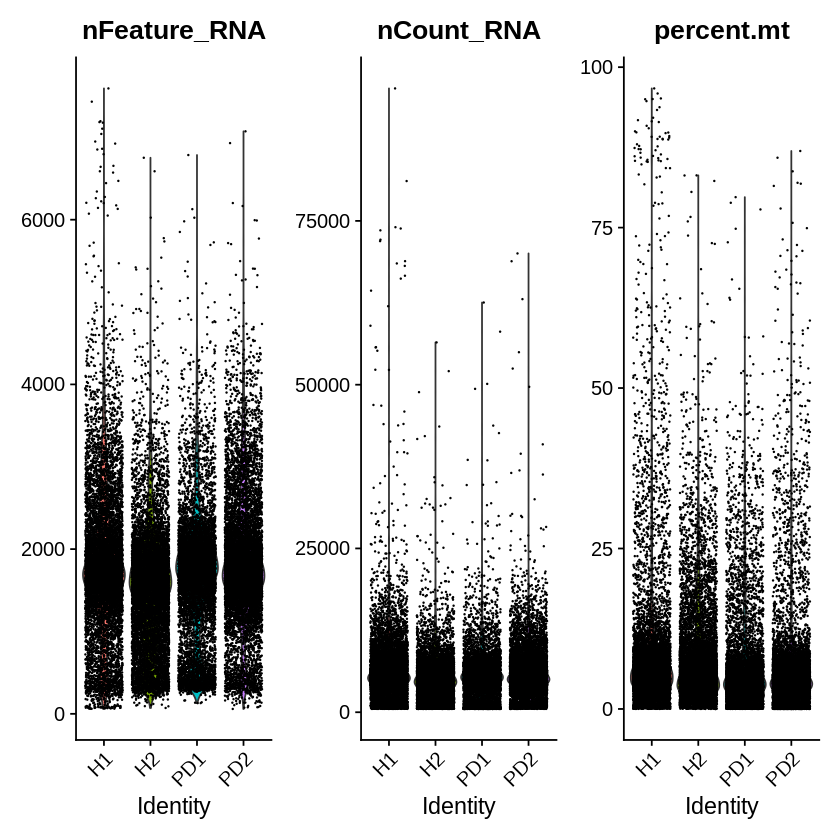

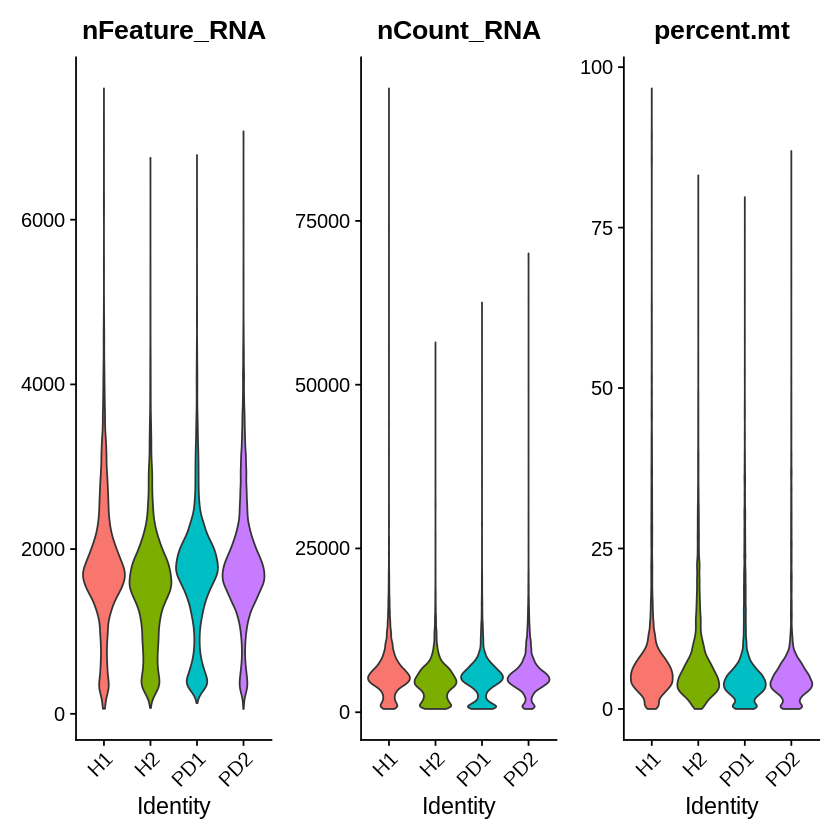

In [ ]:
rawdata[["percent.mt"]] <- PercentageFeatureSet(rawdata, pattern = "^MT-") # "^mt-" in mouse
VlnPlot(rawdata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(rawdata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0)

We can check a optimal threshold using 'geom_hline' from ggplot2.

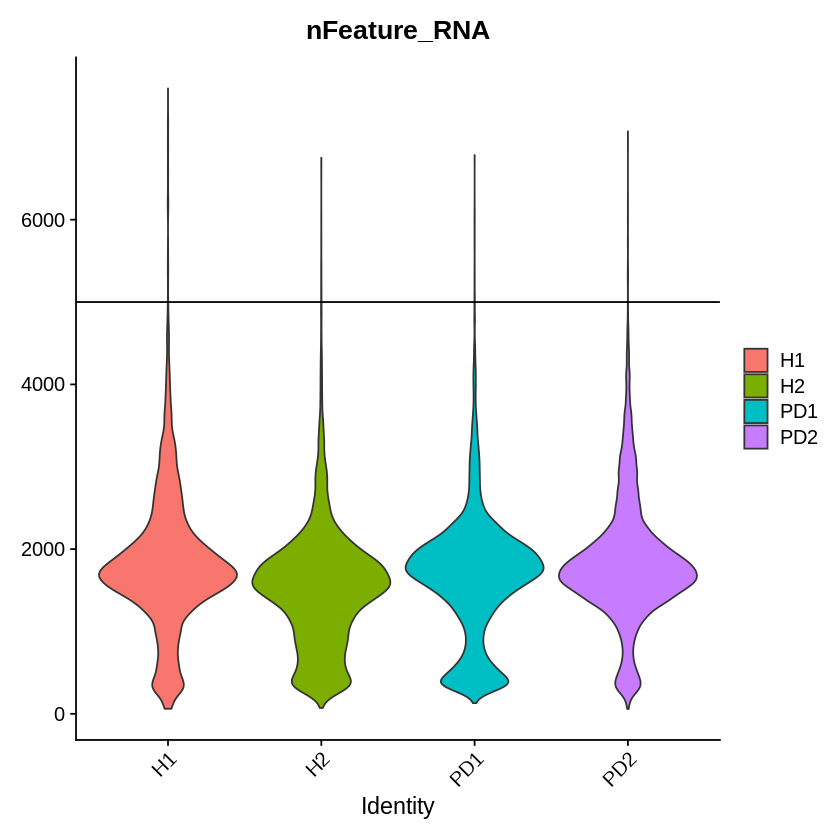

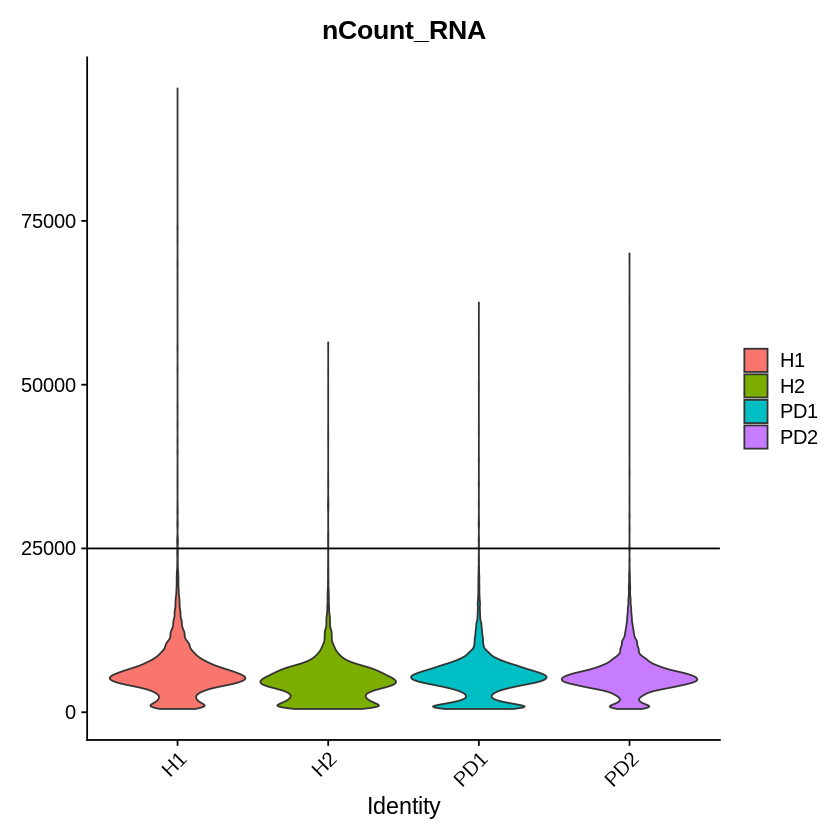

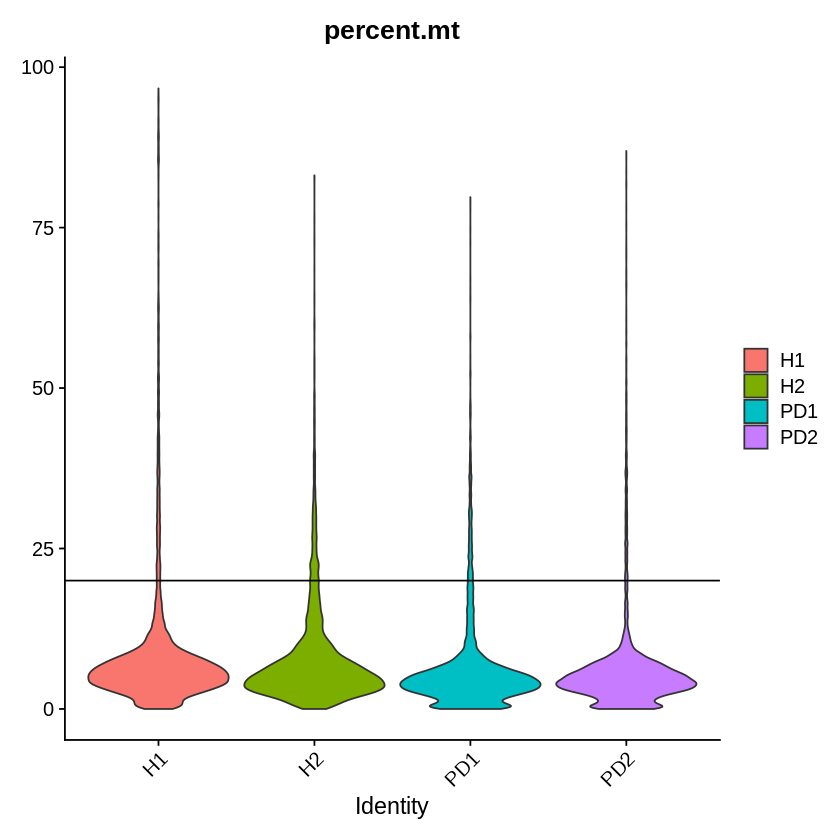

In [ ]:
VlnPlot(rawdata, features = c("nFeature_RNA"), pt.size = 0) + geom_hline(yintercept = 5000)
VlnPlot(rawdata, features = c("nCount_RNA"), pt.size = 0) + geom_hline(yintercept = 25000)
VlnPlot(rawdata, features = c("percent.mt"), pt.size = 0) + geom_hline(yintercept = 20)

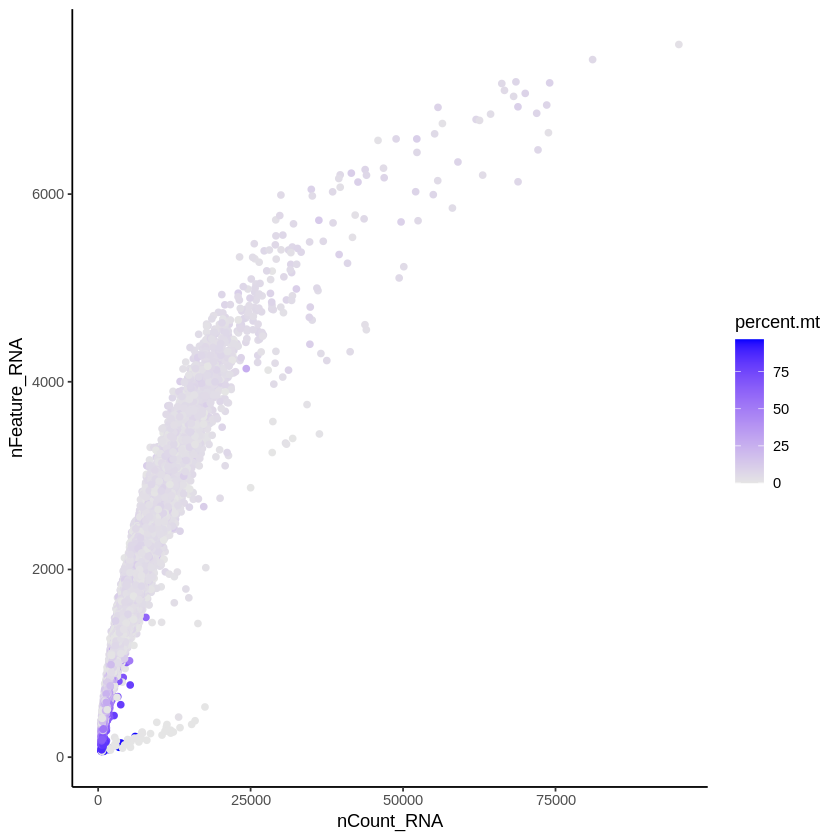

In [ ]:
rawdata@meta.data %>%
  ggplot(aes(x=nCount_RNA, y=nFeature_RNA, color=percent.mt)) +
  geom_point() +
  scale_colour_gradient(low = "gray90", high = "blue") +
  theme_classic()
  # geom_hline(yintercept = 600)

In [ ]:
filtdata <- subset(rawdata, subset = nFeature_RNA > 600 & nFeature_RNA < 5000 & nCount_RNA < 25000 & percent.mt < 20)

In [ ]:
dim(filtdata)

[1] 33538 33184

In [ ]:
#save(filtdata, file = '/content/obj_filtdata.RData')

In [ ]:
load("/content/obj_filtdata.RData")

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **Step 3. Integration**

* Option 1 - Log normalization

In [ ]:
exdata <- NormalizeData(exdata)
exdata <- FindVariableFeatures(exdata)  # default, nfeatures = 2000
exdata <- ScaleData(exdata)

* Option 2 - SCTransform

In [ ]:
exdata <- SCTransform(exdata)

* Log Normalization: 'simple, fast' vs 'zero count, asymmetric distribution'

* SCTransform: 'zero count, variance stabilization' vs 'problems with multiple data comparison (information from the other cells to avoid overestimation), random sampling'

We will use Log normalization in this workshop.

**3-1 Normalization**

In [ ]:
splitdata <- SplitObject(filtdata, split.by = "orig.ident")
splitdata <- lapply(X = splitdata, FUN = function(x) {
  x <- NormalizeData(x)
  x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

**3-2 select repeatedly variable features across datasets for integration**

In [ ]:
features <- SelectIntegrationFeatures(object.list = splitdata)

**3-3 Scale and run pca**

In [ ]:
splitdata <- lapply(X = splitdata, FUN = function(x) {
  x <- ScaleData(x, features = features, verbose = FALSE)
  x <- RunPCA(x, features = features, verbose = FALSE)
})

In [ ]:
#save(features, splitdata, file = '/content/obj_splitdata.RData')

In [ ]:
.libPaths("/content/content/library")
library(Seurat); library(ggplot2); library(dplyr)
load('/content/obj_splitdata.RData')

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**3-4 Integrate data**

In [ ]:
anchors <- FindIntegrationAnchors(object.list = splitdata, anchor.features = features, reduction = "rpca")
intdata <- IntegrateData(anchorset = anchors)
DefaultAssay(intdata)

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 5586 anchors

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 5066 anchors

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 4571 anchors

Warning message:
“Layer counts isn't

In [ ]:
#save(intdata, file = '/content/obj_intdata.RData')

In [ ]:
.libPaths("/content/content/library")
library(Seurat); library(ggplot2); library(dplyr)
load('/content/obj_intdata.RData')

# **Step 4. Run UMAP on a single integrated dataset**

In [ ]:
DefaultAssay(intdata) <- "integrated"
intdata <- ScaleData(intdata, verbose = FALSE)
intdata <- RunPCA(intdata, npcs = 50, verbose = FALSE)

[1] 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

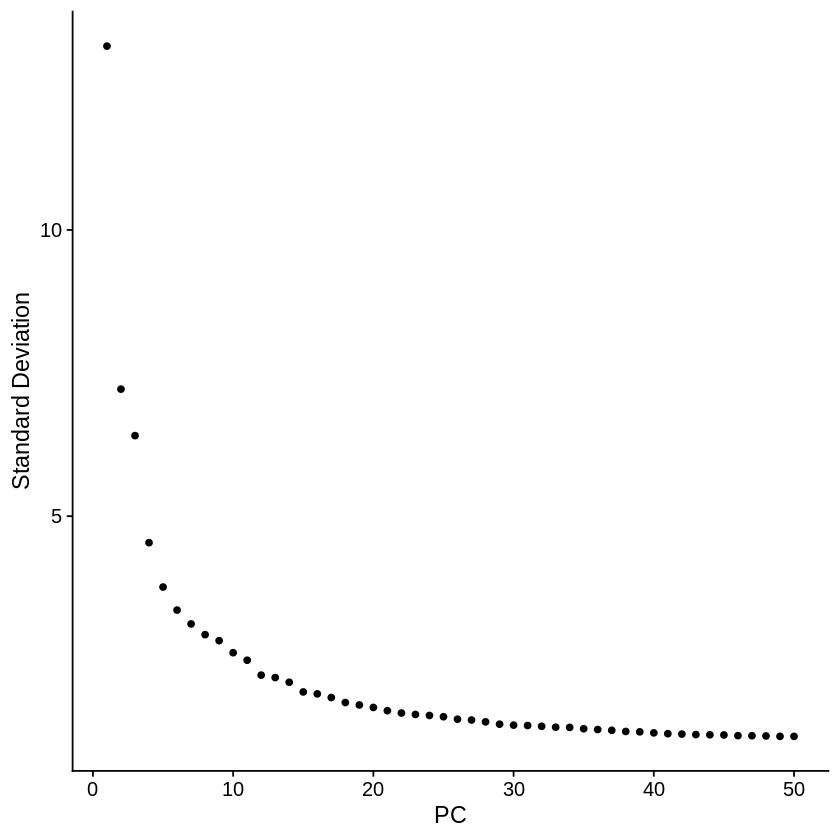

In [ ]:
# choose npcs
ElbowPlot(intdata, ndims = 50)
cumsd <- cumsum(intdata@reductions$pca@stdev)/sum(intdata@reductions$pca@stdev)
which(cumsd > 0.8)

07:02:11 UMAP embedding parameters a = 0.9922 b = 1.112

07:02:11 Read 33184 rows and found 33 numeric columns

07:02:11 Using Annoy for neighbor search, n_neighbors = 30

07:02:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:02:18 Writing NN index file to temp file /tmp/RtmpNw6TB1/file38e4366b81fd

07:02:18 Searching Annoy index using 1 thread, search_k = 3000

07:02:36 Annoy recall = 100%

07:02:36 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:02:38 Initializing from normalized Laplacian + noise (using irlba)

07:02:44 Commencing optimization for 200 epochs, with 1496900 positive edges

07:03:04 Optimization finished



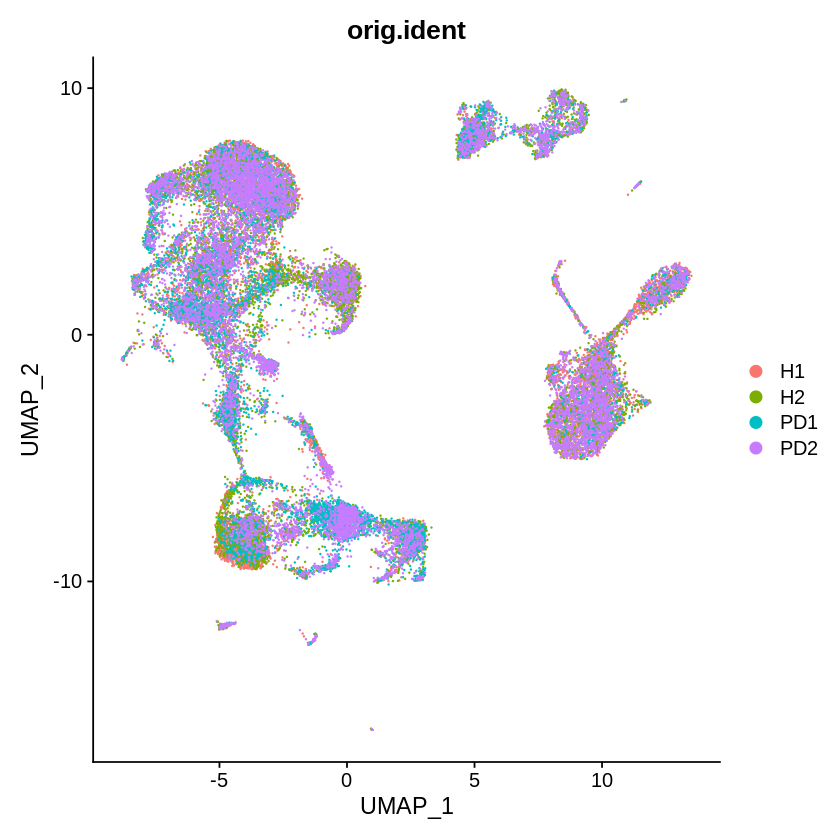

In [ ]:
intdata <- RunUMAP(intdata, reduction = "pca", dims = 1:33) # 1 min
DimPlot(intdata, group.by = 'orig.ident')

# **Step 5. Clustering**

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33184
Number of edges: 1337430

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9594
Number of communities: 19
Elapsed time: 11 seconds


H1_AAACCCACAAGCGATG-1 H1_AAACCCACACTCCACT-1 H1_AAACCCAGTATAGGAT-1 
                    2                     5                     1 
H1_AAACCCATCGCGTAGC-1 H1_AAACGAACAAGAGATT-1 H1_AAACGAACACGACGTC-1 
                    3                     2                     2 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

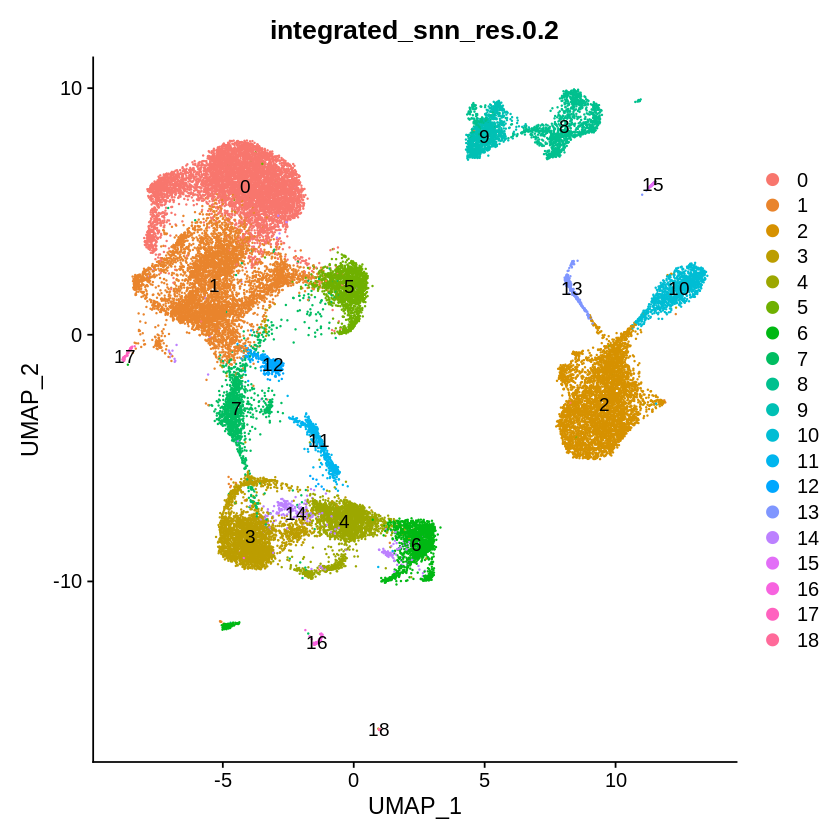

In [ ]:
intdata <- FindNeighbors(intdata, reduction = "pca", dims = 1:33)
intdata <- FindClusters(intdata, resolution = 0.2)
head(intdata$integrated_snn_res.0.2)
DimPlot(intdata, group.by = 'integrated_snn_res.0.2', label = T)

# **Step 6. Annotation**

In [ ]:
intdata@assays
DefaultAssay(intdata) <- 'RNA'

$RNA
Assay data with 33538 features for 33184 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2,
AL627309.4, AL732372.1, OR4F29, AC114498.1 

$integrated
Assay data with 2000 features for 33184 cells
Top 10 variable features:
 FCER1A, IGLC2, IGLC3, S100A9, CST3, PTGDS, HLA-DQA1, S100A8, IGKC,
HLA-DRA 


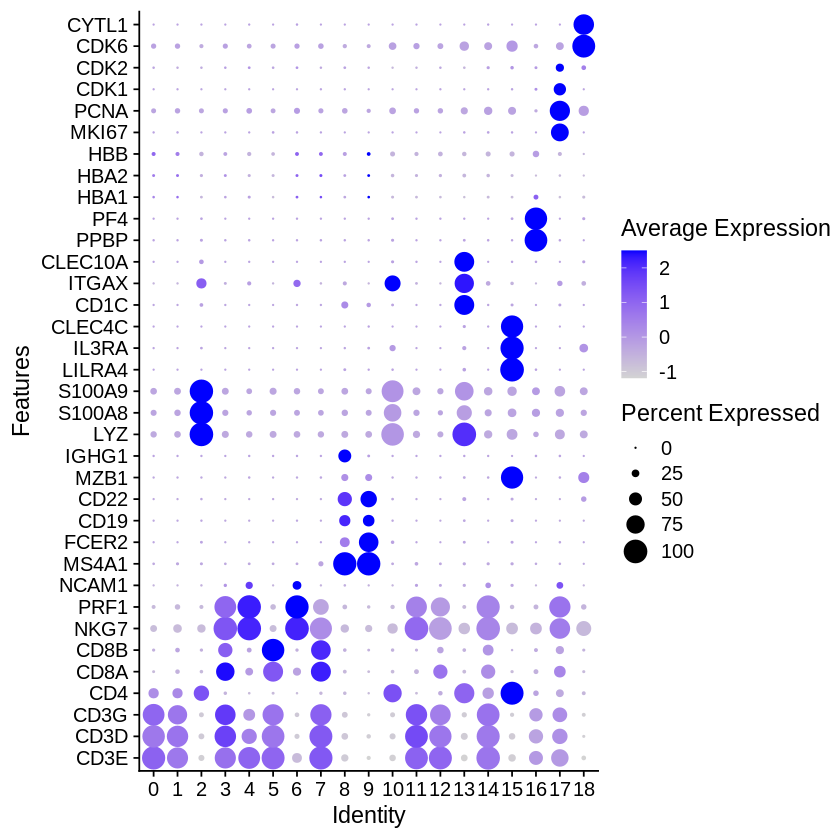

In [ ]:
T_marker <- c("CD3E","CD3D","CD3G",'CD4','CD8A','CD8B')
NK_marker <- c('NKG7','PRF1','NCAM1')
B_marker <- c('MS4A1','FCER2','CD19','CD22')
plasma_marker <- c('MZB1','IGHG1')
monocyte_marker <- c('LYZ','S100A8','S100A9')
pDC_marker <- c('LILRA4','IL3RA','CLEC4C')
mDC_marker <- c('CD1C','ITGAX','CLEC10A')
platelet_marker <- c('PPBP','PF4')
RBC_marker <- c('HBA1','HBA2','HBB')
proliferating_marker <- c('MKI67','PCNA','CDK1', 'CDK2')
progenitor_marker <- c('CDK6', 'CYTL1')


DotPlot(intdata, features = c(T_marker, NK_marker, B_marker,  plasma_marker, monocyte_marker, pDC_marker, mDC_marker,
                              platelet_marker, RBC_marker, proliferating_marker, progenitor_marker)) +
                                coord_flip()

In [27]:
celltype <- c('0' = 'CD4T',
              '1' = 'CD4T',
              '2' = 'monocyte',
              '3' = 'CD8T',
              '4' = 'NK',
              '5' = 'CD8T',
              '6' = 'NK',
              '7' = 'CD8T',
              '8' = 'B',
              '9' = 'B',
              '10' = 'monocyte',
              '11' = 'NK',
              '12' = 'CD8T',
              '13' = 'mDC',
              '14' = 'CD8T',
              '15' = 'pDC',
              '16' = 'platelet',
              '17' = 'proliferating',
              '18' = 'progenitor'
)

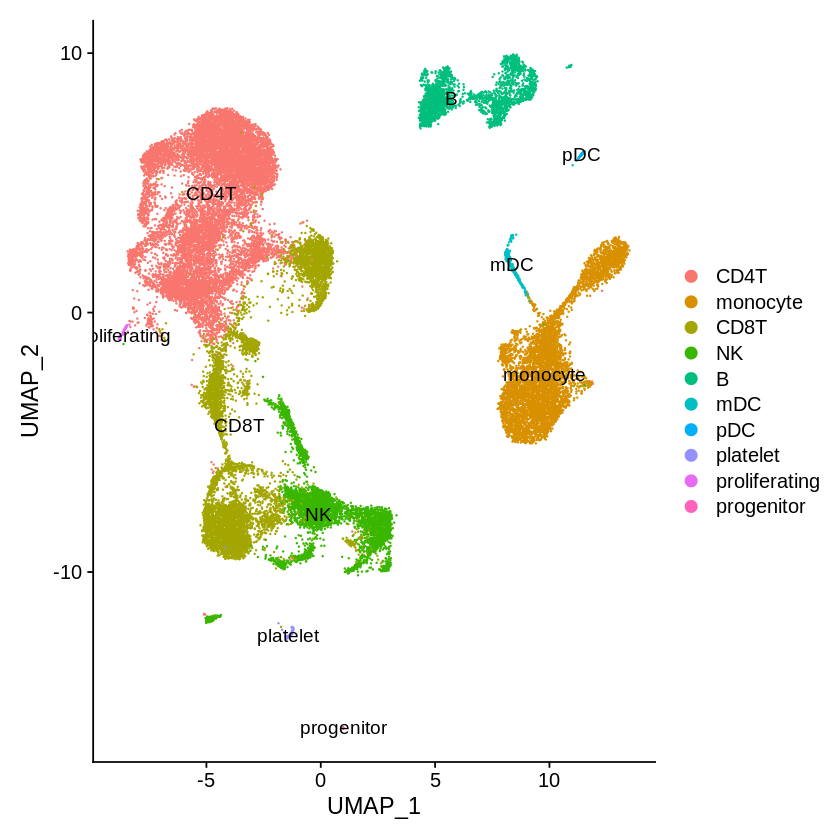

In [28]:
Idents(intdata) <- 'integrated_snn_res.0.2'
intdata <- RenameIdents(intdata, celltype)
celltype <- Idents(intdata)
intdata$celltype <- celltype
DimPlot(intdata, label = T)

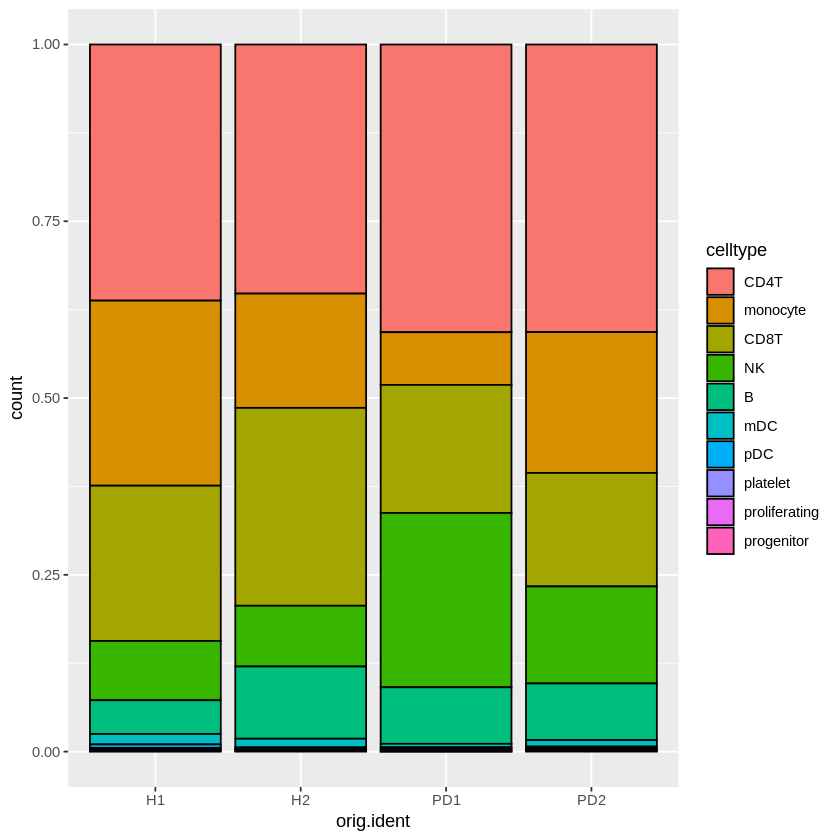

In [29]:
ggplot(data = intdata@meta.data, aes(x = orig.ident, fill = celltype)) +
  geom_bar(position = 'fill', colour="black")